In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5332 - loss: 0.6957
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.6191 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.5785 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7255 - loss: 0.5182 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8029 - loss: 0.4706 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8103 - loss: 0.4408 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8255 - loss: 0.4240 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.3727 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8785 - loss: 0.3344 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3302 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


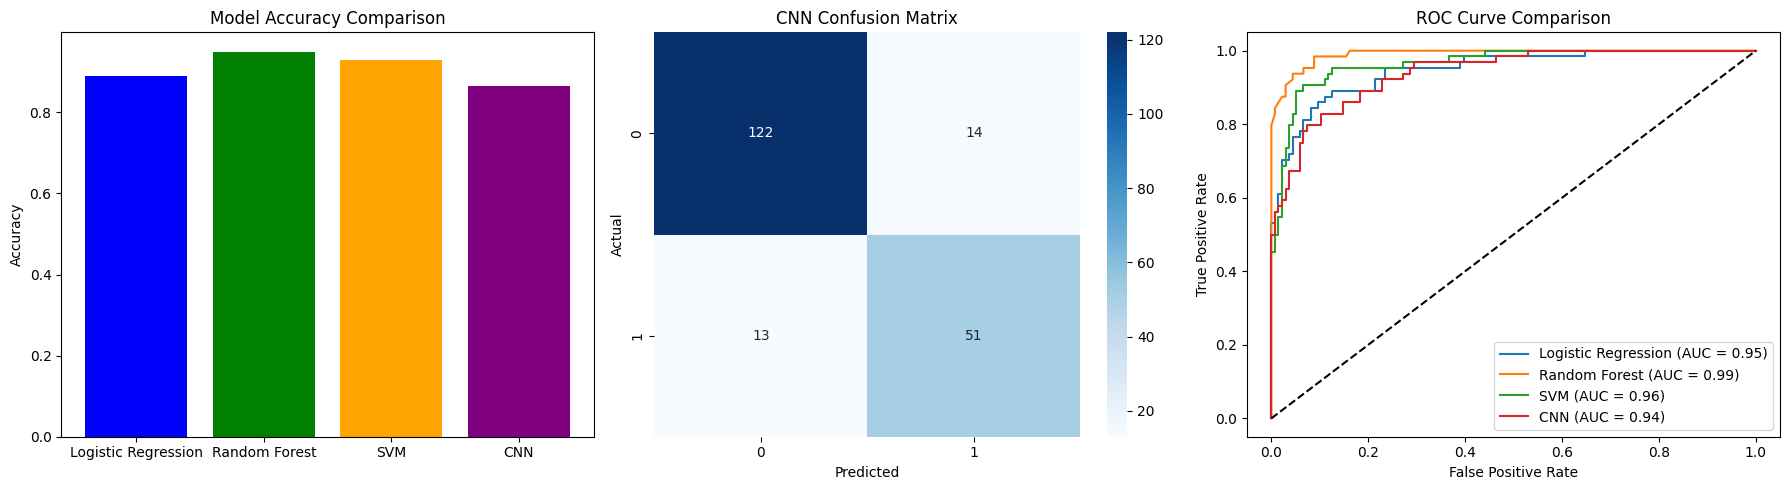

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

# Simulate dataset
np.random.seed(42)
num_samples = 1000
X = pd.DataFrame({
    'hours_studied': np.random.normal(5, 2, num_samples),
    'attendance': np.random.normal(80, 10, num_samples),
    'assignments_completed': np.random.randint(0, 10, num_samples),
    'parental_education': np.random.randint(0, 5, num_samples),
    'internet_access': np.random.randint(0, 2, num_samples),
    'past_failures': np.random.randint(0, 4, num_samples),
})

X['pass'] = (
    (X['hours_studied'] > 5).astype(int) +
    (X['attendance'] > 75).astype(int) +
    (X['assignments_completed'] > 5).astype(int) +
    (X['parental_education'] > 2).astype(int) +
    (X['internet_access'] == 1).astype(int) -
    (X['past_failures'] > 1).astype(int)
)
X['pass'] = (X['pass'] > 2).astype(int)

# Split and scale
y = X.pop('pass')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ML models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "conf_matrix": confusion_matrix(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob),
        "roc_curve": roc_curve(y_test, y_prob)
    }

# CNN
X_train_cnn = X_train_scaled.reshape(-1, 2, 3, 1)
X_test_cnn = X_test_scaled.reshape(-1, 2, 3, 1)

cnn = Sequential([
    Conv2D(16, (2,2), activation='relu', input_shape=(2, 3, 1)),
    MaxPooling2D((1,1)),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)

y_pred_cnn = (cnn.predict(X_test_cnn) > 0.5).astype(int)
y_prob_cnn = cnn.predict(X_test_cnn).flatten()
results["CNN"] = {
    "accuracy": accuracy_score(y_test, y_pred_cnn),
    "conf_matrix": confusion_matrix(y_test, y_pred_cnn),
    "roc_auc": roc_auc_score(y_test, y_prob_cnn),
    "roc_curve": roc_curve(y_test, y_prob_cnn)
}

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Accuracy bar plot
accuracies = {k: v["accuracy"] for k, v in results.items()}
axs[0].bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'purple'])
axs[0].set_title("Model Accuracy Comparison")
axs[0].set_ylabel("Accuracy")

# Confusion matrix of CNN
sns.heatmap(results["CNN"]["conf_matrix"], annot=True, fmt="d", cmap="Blues", ax=axs[1])
axs[1].set_title("CNN Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

# ROC curves
for name, res in results.items():
    fpr, tpr, _ = res["roc_curve"]
    axs[2].plot(fpr, tpr, label=f'{name} (AUC = {res["roc_auc"]:.2f})')
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].legend()
axs[2].set_title("ROC Curve Comparison")
axs[2].set_xlabel("False Positive Rate")
axs[2].set_ylabel("True Positive Rate")

plt.tight_layout()
plt.show()
